In [1]:
import openai

client = openai.OpenAI(api_key = open('openai.key', 'rt').read().strip())

In [2]:
import json

def extract_locations(query):
    try:
        response = client.chat.completions.create(
          model="gpt-4-1106-preview",
          messages=[
            {
              "role": "system",
              "content": """
You are a text labeller.
Your goal is to find all of the location names in the text.
Output only a RFC8259 compliant JSON in the following format:

[
    {"location": "<location name 1 from the text>"},
    {"location": "<location name 2 from the text>"}
]

If there are no locations, just output []."""
            },
            {
              "role": "user",
              "content": query
            }
          ],
          temperature=0,
          max_tokens=1024,
          top_p=0,
          frequency_penalty=0,
          presence_penalty=0
        )
        return json.loads((response.choices[0].message.content))
    except:
        return None

In [3]:
print(extract_locations('London is the capital of the United Kingdom.'))

[{'location': 'London'}, {'location': 'United Kingdom'}]


In [4]:
print(extract_locations('Good morning, mister Johnson'))

[]


In [5]:
def sum_numbers(a, b):
    try:
        response = client.chat.completions.create(
          model="gpt-4-1106-preview",
          messages=[
            {
              "role": "user",
              "content": "Find sum of two numbers: {}+{}. Output only one number without any comments.".format(a, b)
            }
          ],
          temperature=0,
          max_tokens=1024,
          top_p=0,
          frequency_penalty=0,
          presence_penalty=0
        )
        return int(response.choices[0].message.content)
    except:
        return None

In [6]:
print(sum_numbers(2, 2))

4


In [7]:
print(sum_numbers(37, 23))

60


In [8]:
print(sum_numbers(16384, 16384))

32768


In [9]:
import numpy as np
def get_embedding(text, model="text-embedding-ada-002"):
   return np.array(client.embeddings.create(input = [text], model=model).data[0].embedding)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

hw = get_embedding("Hello, world!")
ge = get_embedding("Good evening!")
gm = get_embedding("Good morning!")
rt = get_embedding("This is a random text about cats.")

print(cosine_similarity([hw, ge, gm, rt]))

[[1.         0.87158934 0.86971587 0.80427534]
 [0.87158934 1.         0.91557202 0.78931371]
 [0.86971587 0.91557202 1.         0.78040083]
 [0.80427534 0.78931371 0.78040083 1.        ]]


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from io import BytesIO

def plot_image(query):
    response = client.images.generate(
      model="dall-e-3",
      prompt=query,
      size="1024x1024",
      quality="standard",
      n=1,
    )
    #print(response)
    img_response = requests.get(response.data[0].url)
    img = mpimg.imread(BytesIO(img_response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return response.data[0].url

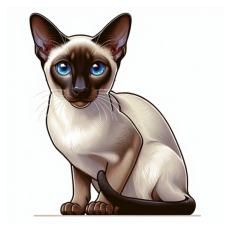

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-EpzvkpEseOue5SsqY00jV4C9/user-tu71u9UUMxKlTkzBMffQDIpB/img-44QjzXsxoG3xOaedcVXHNOoR.png?st=2023-11-24T08%3A51%3A50Z&se=2023-11-24T10%3A51%3A50Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-11-24T08%3A44%3A22Z&ske=2023-11-25T08%3A44%3A22Z&sks=b&skv=2021-08-06&sig=bv/pHKYtsZfgdKNHHLS/C7k76BvkLUVaMVRjbB9LYQ4%3D'

In [12]:
plot_image("A white siamese cat.")

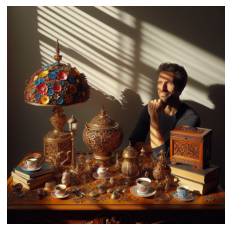

In [13]:
person_url = plot_image("A happy person sitting by the table. There are many objects around, pay attention to details of the objects.")

In [14]:
def describe_image(image_url):
    response = client.chat.completions.create(
      model="gpt-4-vision-preview",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": """
    Describe all of the objects depicted in the image.
    Think about people emotions if they are presented.
    Pay attention to details like car makes, light, food, etc."""},
            {
              "type": "image_url",
              "image_url": {
                "url": image_url,
              },
            },
          ],
        }
      ],
      max_tokens=1024,
    )

    print(response.choices[0].message.content)

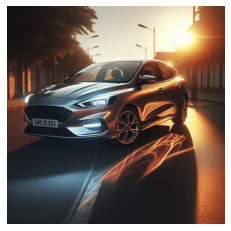

In [15]:
car_url = plot_image("A picture of a Ford Focus.")

In [16]:
describe_image(person_url)

The image shows a collection of detailed and ornate objects set upon a wooden table with intricate designs. Here's a description of the objects and the setting:

1. A man with a slight smile, suggesting a sense of contentment or quiet happiness, is sitting on the right side of the frame. He has dark hair, a bit of facial hair, and is wearing a black T-shirt layered under a grey sweater. His right hand is resting on his chin thoughtfully.

2. A decorative lamp with colorful floral patterns and intricate details sits on the left side of the table.

3. A large, ornately carved spherical object, possibly a container or a form of urn, is sitting atop the table central in the frame.

4. To the right of the spherical object is a smaller version with similar intricate designs and patterns.

5. A traditional-style teapot with intricate metalwork is placed in front of the large spherical object. It is flanked by a matching sugar bowl and a small creamer.

6. Various smaller items, including what

In [17]:
describe_image(car_url)

The image shows a modern vehicle parked on a street bathed in the warm glow of a setting or rising sun. The car is a Ford, recognizable by its emblem on the front grille, and appears to be a sporty model with multi-spoke alloy wheels that have a dark finish. The car's paint has a metallic sheen that reflects the surrounding light, enhancing the contours of its bodywork.

There are no visible people in the photo to gauge emotions. The environment suggests an urban or suburban area with trees and street lamps lining the roadside. The long shadows and orange hue of the sunlight suggest early morning or late evening, creating a peaceful atmosphere with no apparent movement or activity. The license plate is visible but does not correspond to any real-world standard and is likely designed for the photo.

No food, other specific car makes, or additional objects of particular note are present in the image; the focus is clearly on the car and the ambiance created by the lighting conditions.


In [18]:
#from IPython.display import Audio

def text_to_speech(text):
    response = client.audio.speech.create(
        model="tts-1",
        voice="alloy",
        input=text,
    )
    response.stream_to_file("output.mp3")
    #Audio("output.mp3", autoplay=False)
    audio_file= open("output.mp3", "rb")
    transcript = client.audio.transcriptions.create(
      model="whisper-1", 
      file=audio_file
    )
    print(transcript.text)

In [19]:
text_to_speech("London is the capital of the United Kingdom.")

London is the capital of the United Kingdom.
